## Dry Bean DataSet DataSet

https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

Output - type of Bean - Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira

In [1]:
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_excel('./Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### Dataset Info

In [3]:
df.shape

(13611, 17)

In [4]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [5]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

### SVM

In [7]:
df.iloc[:, :-1] = StandardScaler().fit_transform(df.iloc[:, :-1])
df.iloc[:, -1] = LabelEncoder().fit_transform(df.iloc[:, -1])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16788\3129229942.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, -1] = LabelEncoder().fit_transform(df.iloc[:, -1])


In [8]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,5
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,5
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,5
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,5
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,5


In [9]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [12]:
model = SVC(probability=False)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [13]:
accuracy = metrics.accuracy_score(y_test, pred)
accuracy

0.9297257590597453

In [14]:
metrics.confusion_matrix(y_test, pred)

array([[348,   0,  20,   0,   1,   3,   5],
       [  0, 156,   0,   0,   0,   0,   0],
       [ 11,   0, 435,   0,  10,   1,   2],
       [  0,   0,   0, 988,   3,  18,  59],
       [  1,   0,   8,   6, 562,   0,   9],
       [  5,   0,   0,  13,   0, 602,  21],
       [  2,   0,   1,  68,  11,   9, 706]], dtype=int64)

### SVM Parameter Optimization

In [15]:
def FitnessFunction(df, k, c, e):
    model = SVC(C=c, kernel=k, tol=e, probability=False)
    x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    return accuracy

In [16]:
def OptimizationFunction(df, num_samples, iteration):
    
    kernelList = ['linear', 'poly', 'rbf', 'sigmoid']
    bestSampleAccuracy = 0
    bestSample = 0
    bestSampleList = []
    accuracy_list = []
    for i in range(num_samples):
        sample = df.sample(1000, random_state=i)
        sample_accuracy_list = []
        bestAccuracy = 0
        bestKernel =  ""
        bestC = 0
        bestEpsilon = 0
        
        for itr in range(iteration):
            k = np.random.choice(kernelList, 1)
            c = round(np.random.uniform(0.001, 1.0), 3)
            e = round(np.random.uniform(0.001, 1.0), 3)
            
            accuracy = FitnessFunction(sample, k, c, e)

            if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestKernel = k
                bestC = c
                bestEpsilon = e
                  
            if itr%10 == 0:
                sample_accuracy_list.append([itr, bestAccuracy, bestKernel, bestC, bestEpsilon])
        
        accuracy_list.append([i, bestAccuracy, bestKernel, bestC, bestEpsilon])
                
        if bestAccuracy > bestSampleAccuracy:
            bestSampleAccuracy = bestAccuracy
            bestSample = i
            print(bestSampleAccuracy, bestSample)
            bestSampleList = sample_accuracy_list           
            
    return bestSampleList, accuracy_list

In [17]:
iteration = 1000
num_samples = 10

In [18]:
bestSampleList, accuracy_list = OptimizationFunction(df, num_samples, iteration)

0.9533333333333334 0
0.9633333333333334 1


In [24]:
sample_df = pd.DataFrame(bestSampleList, columns=['iteration', 'bestAccuracy', 'bestKernel', 'bestC', 'bestEpsilon'])
accuracy_df = pd.DataFrame(accuracy_list, columns=['Sample #', 'Best Accuracy', 'Best Kernel', 'Best C', 'Best Epsilon'])

In [29]:
accuracy_df

,Sample #,Best Accuracy,Best Kernel,Best C,Best Epsilon
0,0,0.953333,[rbf],0.718,0.194
1,1,0.963333,[rbf],0.886,0.392
2,2,0.950000,[linear],0.383,0.276
3,3,0.940000,[linear],0.773,0.629
4,4,0.963333,[linear],0.711,0.333
5,5,0.943333,[rbf],0.161,0.412
6,6,0.946667,[rbf],0.771,0.149
7,7,0.946667,[linear],0.588,0.157
8,8,0.956667,[linear],0.733,0.632
9,9,0.953333,[rbf],0.221,0.518


In [25]:
sample_df.head()

,iteration,bestAccuracy,bestKernel,bestC,bestEpsilon
0,0,0.810000,[poly],0.499,0.192
1,10,0.930000,[linear],0.404,0.651
2,20,0.943333,[linear],0.849,0.702
3,30,0.943333,[linear],0.849,0.702
4,40,0.950000,[linear],0.411,0.160


In [26]:
sample_df.tail()

,iteration,bestAccuracy,bestKernel,bestC,bestEpsilon
95,950,0.963333,[rbf],0.886,0.392
96,960,0.963333,[rbf],0.886,0.392
97,970,0.963333,[rbf],0.886,0.392
98,980,0.963333,[rbf],0.886,0.392
99,990,0.963333,[rbf],0.886,0.392


In [27]:
sample_df.shape

(100, 5)

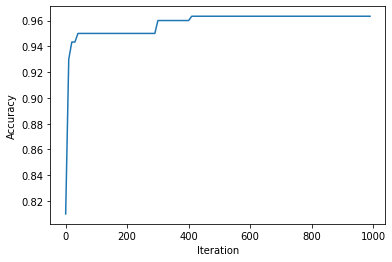

In [28]:
plt.plot(sample_df['iteration'], sample_df['bestAccuracy'])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()